<a href="https://colab.research.google.com/github/Nirrax/zed_lab/blob/main/ZED_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab2. Generowanie liczb losowych o wybranym rozkładzie prawdopodobieństwa

In [ ]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt

Funkcje generujące wartości (zad1 - zad3)

In [ ]:
def gen1(m: int) -> list[float]:
  values = []
  for i in range(0, m):
    values.append(-math.log(1 - random.uniform(0,1)))

  return values

def gen2(m: int, a: int = 0, b: int = 4, c: int = 2, d: int = 100) -> list[float]:
  values = []
  for i in range(0, m):
    x = random.uniform(0,1)
    diff = (c-a)/(b-a)

    if x < diff:
      values.append(a + math.sqrt((b-a)*(c-a)*x))
    else:
      values.append(b - math.sqrt((b-a)*(c-a)*(1-x)))

  return values

def gen3(m: int) -> list[(float, float)]:
  values = []
  for i in range(0, m):
    u1 = random.uniform(0,1)
    u2 = random.uniform(0,1)
    x = (-2 * math.log(u1)) ** (1/2) * math.cos(2 * math.pi * u2)
    y = (-2 * math.log(u1)) ** (1/2) * math.sin(2 * math.pi * u2)
    values.append((x, y))

  return values

Zadanie 1

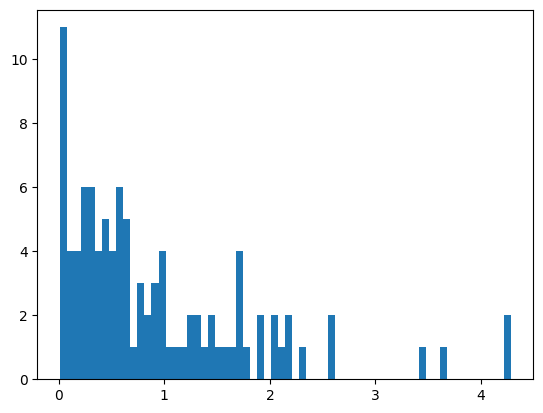

In [ ]:
values = gen1(100)
plt.hist(values, bins = 64)
plt.show()

Zadanie 2

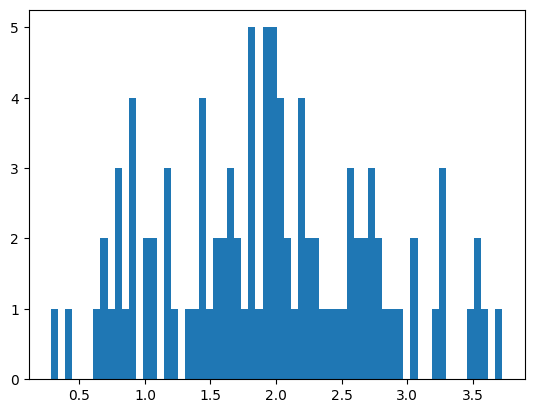

In [ ]:
values = gen2(100)
plt.hist(values, bins = 64)
plt.show()

Zadanie 3


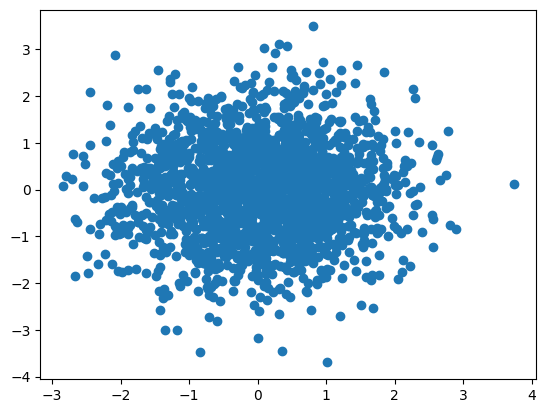

In [ ]:
values = gen3(2000)
plt.scatter([x for x, y in values], [y for x, y in values])
plt.show()

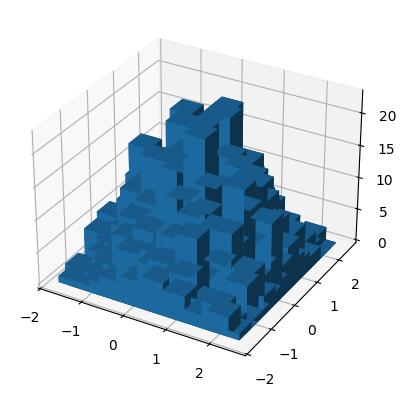

In [ ]:
x = [x for x, y in values]
y = [y for x, y in values]

x = np.array(x)
y = np.array(y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=16, range=[[-2, 2], [-2, 2]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz)

plt.show()

Zadanie 4